## 1. 데이터 둘러보기

In [51]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [29]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 데이터 불러오기
gm = pd.read_excel('/content/drive/MyDrive/data/2023 스터디 프로젝트 데이터/오픈마켓/오픈마켓 매체별 주문 데이터.xlsx', sheet_name = 4)

In [ ]:
gm.head()

,Title,Title_URL,Image,Shop_URL,Shop,Shop_URL1,sale,sale2,Price,Price3,Tag,Tag4,buy,Shop5,Shop6,Current_Time
0,생새우살 특대 사이즈 1+1(약 40마리),"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,16.0,할인,"10,900원","13,000원",최대 2.3% 적립,무료배송,"1,007\n구매",NaN,NaN,2020-12-16 18:03:23.897
1,본사직영! 코웨이 직수정수기 첫 할인!,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,NaN,NaN,"20,900원",NaN,NaN,NaN,"1,786\n구매",NaN,NaN,2020-12-16 18:03:23.993
2,코카콜라 제로 300ml x24페트 +2021 달력,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",코카콜라 브랜드위크 12% 중복할인쿠폰받기,NaN,2.0,할인,"20,580원","21,000원",최대 2.3% 적립,무료배송,"2,019\n구매",12% 중복할인,쿠폰받기,2020-12-16 18:03:24.060
3,나크제이 디퓨저 500ml 크리스마스 에디션,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,61.0,할인,"8,900원","23,000원",최대 2.3% 적립,무료배송,1만+\n구매,NaN,NaN,2020-12-16 18:03:24.113
4,국내산 한치 250gX6팩 / 총 12마리,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/hanbando/202012/8d6...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",공영쇼핑TV 9% 중복쿠폰받기,"javascript:GoSNAChannel('CHM2J042','http://min...",NaN,NaN,"49,900원",NaN,최대 2.3% 적립,무료배송,3\n구매,9% 중복,쿠폰받기,2020-12-16 18:03:24.200


In [ ]:
# 컬럼 기본 정보 확인하기
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         292 non-null    object 
 1   Title_URL     292 non-null    object 
 2   Image         292 non-null    object 
 3   Shop_URL      169 non-null    object 
 4   Shop          169 non-null    object 
 5   Shop_URL1     121 non-null    object 
 6   sale          221 non-null    float64
 7   sale2         221 non-null    object 
 8   Price         292 non-null    object 
 9   Price3        221 non-null    object 
 10  Tag           281 non-null    object 
 11  Tag4          247 non-null    object 
 12  buy           286 non-null    object 
 13  Shop5         169 non-null    object 
 14  Shop6         169 non-null    object 
 15  Current_Time  292 non-null    object 
dtypes: float64(1), object(15)
memory usage: 36.6+ KB


In [ ]:
# 연속형 데이터의 통계치 확인
gm.describe()

,sale
count,221.000000
mean,32.325792
std,23.007760
min,1.000000
25%,11.000000
50%,27.000000
75%,50.000000
max,70.000000


In [ ]:
# 범주형 데이터의 통계치 확인하기
gm.describe(include = np.object_)

,Title,Title_URL,Image,Shop_URL,Shop,Shop_URL1,sale2,Price,Price3,Tag,Tag4,buy,Shop5,Shop6,Current_Time
count,292,292,292,169,169,121,221,292,221,281,247,286,169,169,292
unique,292,292,292,64,101,29,1,189,168,3,1,225,71,1,292
top,생새우살 특대 사이즈 1+1(약 40마리),"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,"javascript:GoSNAChannel('CHM2J043','http://cor...",스마일클럽은 매일 무료배송쿠폰받기,http://shop.gmarket.co.kr/SmartDelivery/SmartD...,할인,"19,900원","30,000원",최대 2.3% 적립,무료배송,1만+\n구매,매일 무료배송,쿠폰받기,2020-12-16 18:03:23.897
freq,1,1,1,31,20,79,221,10,6,201,247,22,31,169,1


In [ ]:
print('Title: ', gm['Title'].unique())
print('Title_URL: ', gm['Title_URL'].unique())
print('Image: ', gm['Image'].unique())
print('Shop_URL: ', gm['Shop_URL'].unique())
print('Shop: ', gm['Shop'].unique())

Title:  ['생새우살 특대 사이즈 1+1(약 40마리)' '본사직영! 코웨이 직수정수기 첫 할인!'
 '코카콜라 제로 300ml x24페트 +2021 달력' '나크제이 디퓨저 500ml 크리스마스 에디션'
 '국내산 한치 250gX6팩 / 총 12마리' '[롯데렌터카]신차장기렌트+블랙박스/썬팅제공'
 '국내생산 3D 일회용마스크 100매 무료배송' '[총12입]모나리자 미용티슈 250매 3입 4팩'
 '[20%+20%] 쉬슬러 고농축 세탁세제 2개+증정' '팬틴 극손상케어 트리트먼트 6개+미니증정'
 '[15%] 제주 달달한 구좌 흙당근 5kg (중-특왕)' '어묵 어묵탕 어묵꼬치 20개+장국4봉'
 '[20%+7%] 바나나는원래하얗다 190ml 24팩' '라이트 스탠다드 참치 100g 15캔 원터치'
 '바다원 햇멸치 1.5kg (고바/ 조림용)' '[15%] 제주돼지 뒷고기 구이용 250g x 4팩'
 '(etv)하림 에어프라이어 순살치킨 480gX2봉' '깨끗한나라 벚꽃 프리미엄 화장지 (총90롤)'
 '통영 베네치아수산 통영 생굴 1kg' '포천이동갈비 돈왕1kg 왕갈비3대 맛집 그대로'
 '[5%쿠폰] 피스넷 프리고 블루투스 이어폰' '[15%쿠폰] 테스 국내산 컬링 가습기 TESS-09W'
 '3.6V 충전식 무선 전동 드라이버 47종 세트' '크리스마스 일주일 쥬얼리 7종세트 외'
 '[15%] 크라운 봉지 과자 골라담기+사은품' '에고이스트 사가퍼 라그랑 볼륨 구스 숏 다운'
 '[25%중복쿠폰] GGPX 패딩/무스탕 외' '밀레  한파의 시작  남여 해비다운/롱패딩 6종'
 '일렉트로룩스 에어로퍼포머 진공청소기' '테팔 스페셜에디션 프라이팬24+28cm' "Age20's 핑크다이아팩트 기획세트"
 '[20%+15%쿠폰] 일리윤 리페어 로션 3개' '프릴 산뜻한 자몽향 750ml 6개 + 증정'
 '에너자이저 패밀리팩 건전지 AA/AAA 총48입' '연세 멸균우유 비타민플러스 48팩+15%'
 '소시지 리치부어스트 1.5kg +핫도그 증정'

In [ ]:
print('Shop_URL1: ', gm['Shop_URL1'].unique())
print('sale2: ', gm['sale2'].unique())
print('Price: ', gm['Price'].unique())
print('Price: ', gm['Price3'].unique())
print('Tag: ', gm['Tag'].unique())
print('Tag: ', gm['Tag4'].unique())
print('buy: ', gm['buy'].unique())
print('Shop5: ', gm['Shop5'].unique())
print('Shop6: ', gm['Shop6'].unique())

Shop_URL1:  [nan
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/gongyoungtv', '');"
 'http://shop.gmarket.co.kr/SmartDelivery/SmartDelivery.aspx'
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/nsmalltv', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/skstoa', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/lotteec', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/iparkmall', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/tefalmall', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/innisfree', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/galleria6', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/LFmallG', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/leecomnepa', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.k

In [ ]:
# 데이터 내용 간단히 정리
print('총 데이터 수 : ', gm.shape[0] * gm.shape[1])
print('총 결측치 수 : {} = 전체 데이터의 {:.2f}%'.format(gm.isnull().sum().sum(), (gm.isnull().sum().sum() * 100) / (gm.shape[0] * gm.shape[1])))
print('G마켓-슈퍼딜 상품 수 : ', gm['Title'].nunique())
print('제공한 쿠폰 상세 페이지 수: ', gm['Shop_URL'].nunique())
print('쿠폰 종류 수 : ', gm['Shop'].nunique())
print('상품 카테고리 수 : ', gm['Shop_URL1'].nunique())
print('적립 가능한 포인트 종류 수 : ', gm['Tag'].nunique())
print('쿠폰 이름 중에서 굵은 글씨 부분 종류 수 : ',gm['Shop5'].nunique())

총 데이터 수 :  4672
총 결측치 수 : 938 = 전체 데이터의 20.08%
G마켓-슈퍼딜 상품 수 :  292
제공한 쿠폰 상세 페이지 수:  64
쿠폰 종류 수 :  101
상품 카테고리 수 :  29
적립 가능한 포인트 종류 수 :  3
쿠폰 이름 중에서 굵은 글씨 부분 종류 수 :  71


## 2. 데이터 정비하기

### 2-1 필요 없는 컬럼 제거하기

In [4]:
# sp1 = sp.drop(['post_code'],axis=1)
# sp1.info()
gm1 = gm.drop(['Title_URL', 'Image', 'Current_Time'], axis = 1)
gm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      292 non-null    object 
 1   Shop_URL   169 non-null    object 
 2   Shop       169 non-null    object 
 3   Shop_URL1  121 non-null    object 
 4   sale       221 non-null    float64
 5   sale2      221 non-null    object 
 6   Price      292 non-null    object 
 7   Price3     221 non-null    object 
 8   Tag        281 non-null    object 
 9   Tag4       247 non-null    object 
 10  buy        286 non-null    object 
 11  Shop5      169 non-null    object 
 12  Shop6      169 non-null    object 
dtypes: float64(1), object(12)
memory usage: 29.8+ KB


### 2-2 컬럼명 바꾸기

In [5]:
gm1.columns = ['title', 'coupon_url', 'coupon_fullname', 'category_url', 'sale_rate', 'sale', 'price', 'before_price', 'point', 'free_delivery', 'buy', 'coupon_category', 'coupon']
gm1.columns

Index(['title', 'coupon_url', 'coupon_fullname', 'category_url', 'sale_rate',
       'sale', 'price', 'before_price', 'point', 'free_delivery', 'buy',
       'coupon_category', 'coupon'],
      dtype='object')

### 2-3 결측치 처리하기

In [6]:
gm1.isnull().sum()

title                0
coupon_url         123
coupon_fullname    123
category_url       171
sale_rate           71
sale                71
price                0
before_price        71
point               11
free_delivery       45
buy                  6
coupon_category    123
coupon             123
dtype: int64

In [7]:
gm1['sale_rate'].fillna(0, inplace = True)
gm1['sale'].fillna('할인x', inplace = True)
gm1['before_price'].fillna(gm1['price'], inplace = True)
gm1['free_delivery'].fillna('무료배송x', inplace = True)
gm1['buy'].fillna(0, inplace = True)
gm1['coupon'].fillna('쿠폰받기x', inplace = True)
gm1.head()

,title,coupon_url,coupon_fullname,category_url,sale_rate,sale,price,before_price,point,free_delivery,buy,coupon_category,coupon
0,생새우살 특대 사이즈 1+1(약 40마리),NaN,NaN,NaN,16.0,할인,"10,900원","13,000원",최대 2.3% 적립,무료배송,"1,007\n구매",NaN,쿠폰받기x
1,본사직영! 코웨이 직수정수기 첫 할인!,NaN,NaN,NaN,0.0,할인x,"20,900원","20,900원",NaN,무료배송x,"1,786\n구매",NaN,쿠폰받기x
2,코카콜라 제로 300ml x24페트 +2021 달력,"javascript:GoSNAChannel('CHM2J043','http://rpp...",코카콜라 브랜드위크 12% 중복할인쿠폰받기,NaN,2.0,할인,"20,580원","21,000원",최대 2.3% 적립,무료배송,"2,019\n구매",12% 중복할인,쿠폰받기
3,나크제이 디퓨저 500ml 크리스마스 에디션,NaN,NaN,NaN,61.0,할인,"8,900원","23,000원",최대 2.3% 적립,무료배송,1만+\n구매,NaN,쿠폰받기x
4,국내산 한치 250gX6팩 / 총 12마리,"javascript:GoSNAChannel('CHM2J043','http://rpp...",공영쇼핑TV 9% 중복쿠폰받기,"javascript:GoSNAChannel('CHM2J042','http://min...",0.0,할인x,"49,900원","49,900원",최대 2.3% 적립,무료배송,3\n구매,9% 중복,쿠폰받기


In [8]:
gm1.isnull().sum()

title                0
coupon_url         123
coupon_fullname    123
category_url       171
sale_rate            0
sale                 0
price                0
before_price         0
point               11
free_delivery        0
buy                  0
coupon_category    123
coupon               0
dtype: int64

### 2-4 컬럼 타입 변경하기

In [9]:
# 가격이 아닌 데이터 제거
gm1.drop(gm1[gm1['price'] == 'SOLD OUT'].index, inplace = True)
gm1.drop(gm1[gm1['price'] == '가입상품'].index, inplace = True)

In [10]:
# '원'을 제거하고 int64로 타입 변경
gm1['price'] = gm1['price'].str.replace(',',"").str.strip('원').astype('int64')
gm1['before_price'] = gm1['before_price'].str.replace(',',"").str.strip('원').astype('int64')

In [11]:
# 구매수량을 int64로 타입 변경
gm1['buy'] = gm1['buy'].str.replace(',',"").str.replace('만', '0000').str.replace('NEW', '0').str.strip('+\n구매').astype('int64')

In [12]:
gm1.head()

,title,coupon_url,coupon_fullname,category_url,sale_rate,sale,price,before_price,point,free_delivery,buy,coupon_category,coupon
0,생새우살 특대 사이즈 1+1(약 40마리),NaN,NaN,NaN,16.0,할인,10900,13000,최대 2.3% 적립,무료배송,1007,NaN,쿠폰받기x
1,본사직영! 코웨이 직수정수기 첫 할인!,NaN,NaN,NaN,0.0,할인x,20900,20900,NaN,무료배송x,1786,NaN,쿠폰받기x
2,코카콜라 제로 300ml x24페트 +2021 달력,"javascript:GoSNAChannel('CHM2J043','http://rpp...",코카콜라 브랜드위크 12% 중복할인쿠폰받기,NaN,2.0,할인,20580,21000,최대 2.3% 적립,무료배송,2019,12% 중복할인,쿠폰받기
3,나크제이 디퓨저 500ml 크리스마스 에디션,NaN,NaN,NaN,61.0,할인,8900,23000,최대 2.3% 적립,무료배송,10000,NaN,쿠폰받기x
4,국내산 한치 250gX6팩 / 총 12마리,"javascript:GoSNAChannel('CHM2J043','http://rpp...",공영쇼핑TV 9% 중복쿠폰받기,"javascript:GoSNAChannel('CHM2J042','http://min...",0.0,할인x,49900,49900,최대 2.3% 적립,무료배송,3,9% 중복,쿠폰받기


## 3. 데이터 분석하기

### 3-1. 상품들의 할인 여부 비율

In [13]:
# 할인이 적용되는 상품과 안되는 상품의 수
gm1['sale'].value_counts()

할인     221
할인x     64
Name: sale, dtype: int64

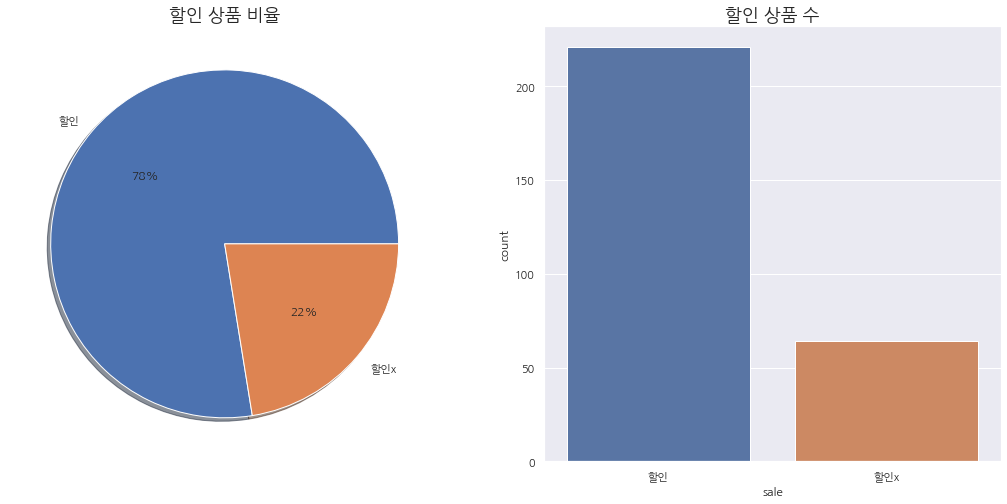

In [14]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

gm1['sale'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True)
ax[0].set_title('할인 상품 비율', size = 18)
ax[0].set_ylabel('')

sns.countplot(data = gm1, x = 'sale', ax = ax[1])
ax[1].set_title('할인 상품 수', size = 18)

plt.show()

### 3-2. 할인 적용 여부에 따른 구매 수량 분포

In [15]:
# 판매가격 확인
gm1['buy'].describe()

count       285.000000
mean      15422.343860
std       70425.928951
min           0.000000
25%         282.000000
50%        1538.000000
75%        8544.000000
max      960000.000000
Name: buy, dtype: float64

In [16]:
# 왜도, 첨도 확인하기
print(gm1['buy'].skew())
print(gm1['buy'].kurt())

10.600334314391926
128.7428765098121


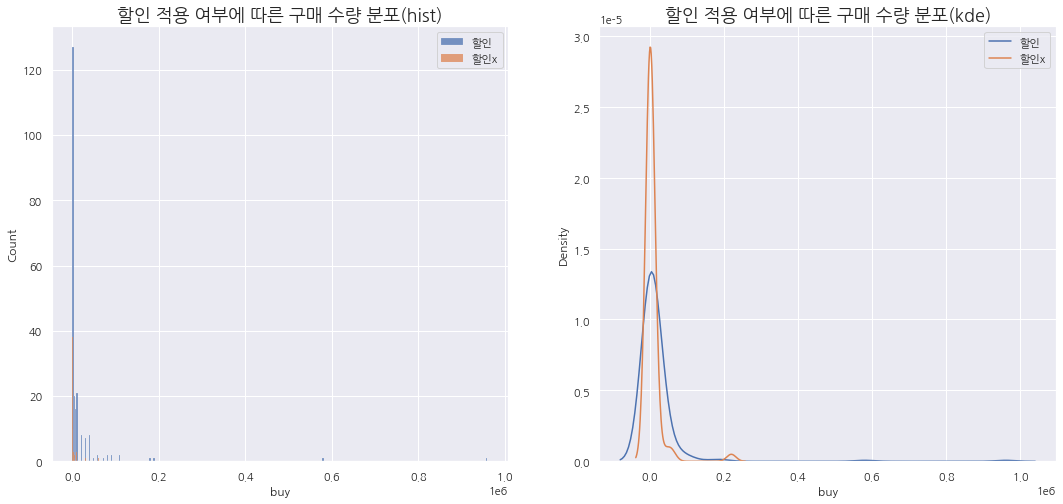

In [17]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.histplot(gm1[gm1['sale'] == '할인']['buy'], label = '할인', ax = ax[0])
sns.histplot(gm1[gm1['sale'] == '할인x']['buy'], label = '할인x', ax = ax[0])
ax[0].legend()
ax[0].set_title('할인 적용 여부에 따른 구매 수량 분포(hist)', size = 18)

sns.kdeplot(gm1[gm1['sale'] == '할인']['buy'], ax = ax[1])
sns.kdeplot(gm1[gm1['sale'] == '할인x']['buy'], ax = ax[1])
ax[1].legend(['할인', '할인x'])
ax[1].set_title('할인 적용 여부에 따른 구매 수량 분포(kde)', size = 18)

plt.show()

### 3-3. 가장 비싼 상품과 가장 싼 상품

In [18]:
# 가장 싼 상품의 가격
min(gm1['price'])

1400

In [19]:
print("{}이 {}원으로 가장 싸다 ".format(gm1[gm1['price'] == min(gm1['price'])]['title'].values, min(gm1['price'])))
print("{}이 {}원으로 가장 비싸다 ".format(gm1[gm1['price'] == max(gm1['price'])]['title'].values, max(gm1['price'])))

['더늦기전에!크리스마스파티 9900이상무배특가전']이 1400원으로 가장 싸다 
['7%쿠폰! 삼성 비스포크 코타화이트 RF85T911101']이 1729000원으로 가장 비싸다 


### 3-4. 상품 카테고리 간 판매 가격 비교

In [20]:
#Groupby로 포인트 적립 종류 별 평균 판매 가격 계산
category = gm1[['category_url', 'price']].groupby(['category_url'], as_index=True).mean()
category

,price
category_url,
http://shop.gmarket.co.kr/SmartDelivery/SmartDelivery.aspx,52091.518987
"javascript:GoSNAChannel('CHM2J042','http://corners.gmarket.co.kr/ExpressShop/Home?SellerId=lottesuper', '');",57900.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/LFmallG', '');",85350.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/NCDEPARTMENTSTORE', '');",186300.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/akplaza1', '');",28080.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/castelbajac', '');",29000.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/debec', '');",33380.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/faple', '');",9810.000000
"javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/filakorea1', '');",59000.000000


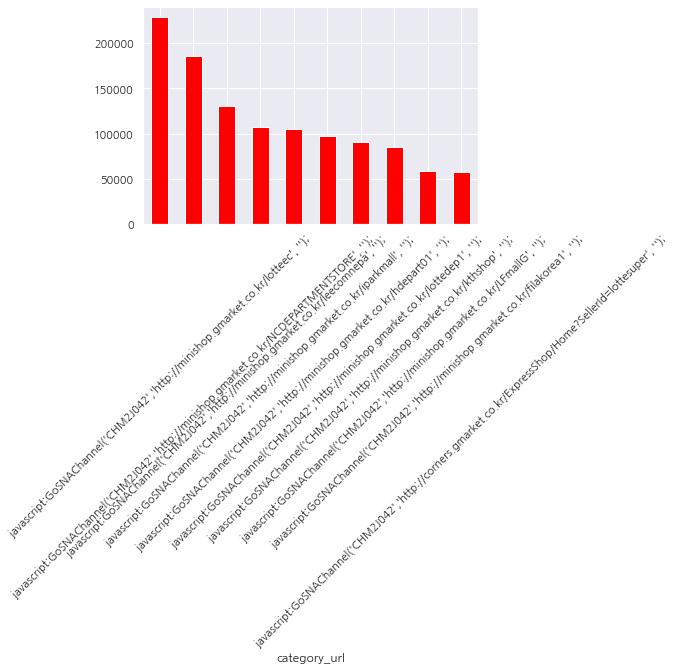

In [21]:
#판매 가격 높은 순으로 상위 10개 카테고리 그래프
category['price'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

### 3-5 상품의 판매 가격 - 구매 수량 상관관계

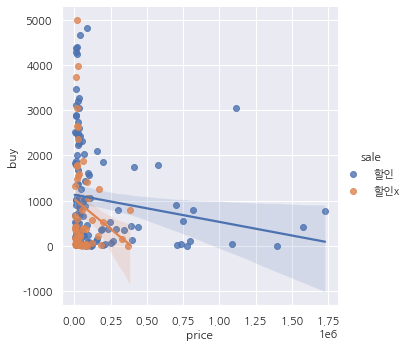

In [39]:
sns.lmplot(data = gm2, x = 'price', y= 'buy', hue = 'sale')
# sns.set_style(style='darkgrid') #어두운 그리드로 배경 지정

plt.show()